# Ordinary Least Squares and Linear Regression

It is common in many fields to want to fit a line to some data, either to capture a general trend in the data or to use as a model of an underlying process, enabling one to make predictions using data outside of that to which the model was fit.

## In Two Dimensions

**Example:** The data below are generated according to the underlying 'true' model $y = 2x + 3 + \mathcal{N}(0, 225)$, where $\mathcal{N}(\mu, \sigma^2)$ refers to [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution) noise with a mean of $\mu=0$ and a variance $\sigma^2=225$ (or equivalently, a standard deviation $\sigma=15$). 

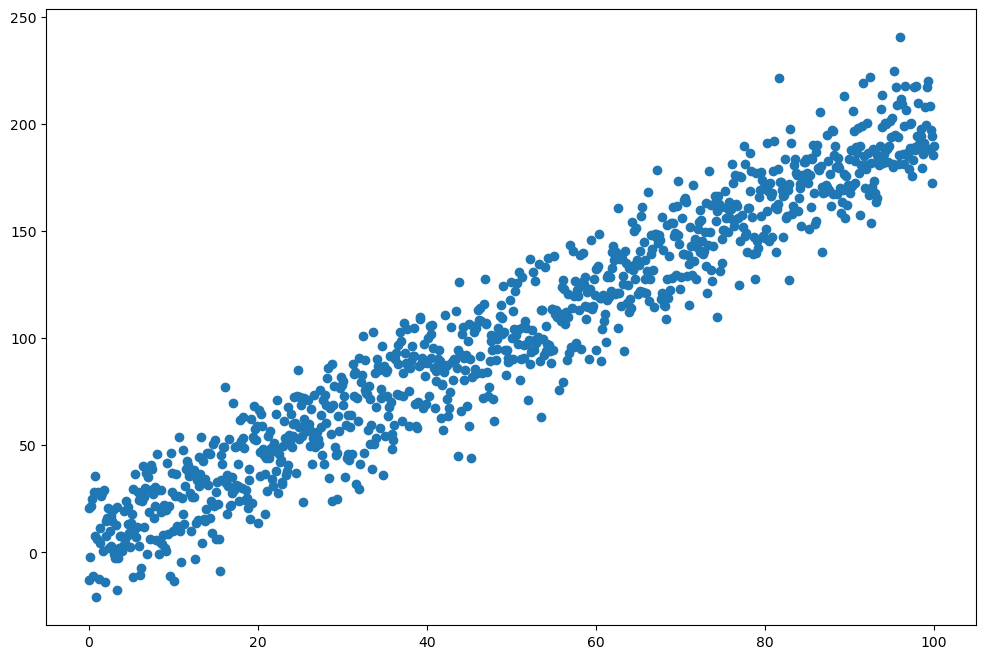

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

figsize(12, 8)

xs = np.linspace(0, 100, 1000)
ys = 2 * xs + 3 + np.random.normal(loc=0, scale=15, size=(1000,))

plt.scatter(xs, ys);

It is obvious that the data in the above plot are not collinear; in general, if $n$ points $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$ are collinear then there exist parameters $m$ and $b$ such that 

$$
    \begin{align*}
        y_1 &= mx_1 + b \\
        y_2 &= mx_2 + b \\
        \vdots &  \\
        y_n &= mx_n + b
    \end{align*}
$$

This linear system can be converted to a matrix equation $\mathbf{y} = X\mathbf{b}$, where the parameters $m$ and $b$ are the components of the vector of unknowns $\mathbf{b}$: 

$$
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_n
    \end{bmatrix} = 
    \begin{bmatrix}
        x_1 & 1 \\
        x_2 & 1 \\
        \vdots & \vdots \\
        x_n & 1 
    \end{bmatrix}\cdot
    \begin{bmatrix}
        m \\
        b
    \end{bmatrix}
$$

Note that the notation here differs slightly from the conventions for matrix equations: in a generic system $A\mathbf{x}=\mathbf{b}$, the vector $\mathbf{x}$ contains the unknowns, while $\mathbf{b}$ is a constant vector. In $\mathbf{y} = X\mathbf{b}$, it is $\mathbf{y}$ that is constant, and $\mathbf{b}$ contains the unknowns $m$ and $b$. The matrix $X$ contains the (constant) input data $x_1,\dots x_n$ along with a column of $1$'s such that the product $X\mathbf{b}$ produces $mx_i + b$ in its components for $1\leq i \leq n$.

The lack of collinearity in the above plot corresponds to the *overdetermined* nature of this system, with $n$ equations to satisfy and only 2 unknown parameters $m$ and $b$ with which to satisfy them, the system is in general not solvable. A trick that we can exploit here is to solve a specific transformed system instead: $X^T\mathbf{y} = X^TX\mathbf{b}$, the system that results from multiplying both sides of the above matrix equation by $X^T$.

Why this specific system is the one we should solve requires some additional background to explain in full; for now, it is perhaps enough to note that $X^TX$ is a $2\times2$ symmetric matrix with linearly independent columns (assuming the columns of $x_i$'s is not a scalar multiple of the column of $1$'s), and therefore (a) the new system will have a solution, and (b) $X^TX$ is nonsingular. Therefore, the solution to the new system can be found using the inverse as follows:

$$
    \begin{align*}
        X\mathbf{b} = \mathbf{y} \\
        X^TX\mathbf{b} & = X^T\mathbf{y} \\
        (X^TX)^{-1}X^TX\mathbf{b} &= (X^TX)^{-1}X^T\mathbf{y} \\
        I\mathbf{b} &= (X^TX)^{-1}X^T\mathbf{y} \\
        \mathbf{b} &= (X^TX)^{-1}X^T\mathbf{y}.
    \end{align*}
$$

The equation above is called the *normal equation*, and for reasons we will see shortly, this solution produces the parameters of the line that best fits the data. 

```{admonition} Definition: The Normal Equation

Given a possibly overdetermined linear system $\mathbf{y} = X\mathbf{b}$, the *normal equation* 

$$
    \mathbf{b} = (X^TX)^{-1}X^T\mathbf{y}
$$

is the solution that provides a line of best fit to the data. 
```

**Example, continued:** Let's form the matrix $X$ and calculate $\mathbf{b}$ according to the following formula:

In [2]:
# start with a 1000 x 2 array of 1's and fill the first column with the xs
X = np.ones(shape=(1000, 2))
X[:, 0] = xs

print(X)

[[  0.          1.       ]
 [  0.1001001   1.       ]
 [  0.2002002   1.       ]
 ...
 [ 99.7997998   1.       ]
 [ 99.8998999   1.       ]
 [100.          1.       ]]


In [3]:
# Solve the equation
bs = np.linalg.inv(X.T @ X) @ X.T @ ys

print(bs)

[1.97480751 3.8400334 ]


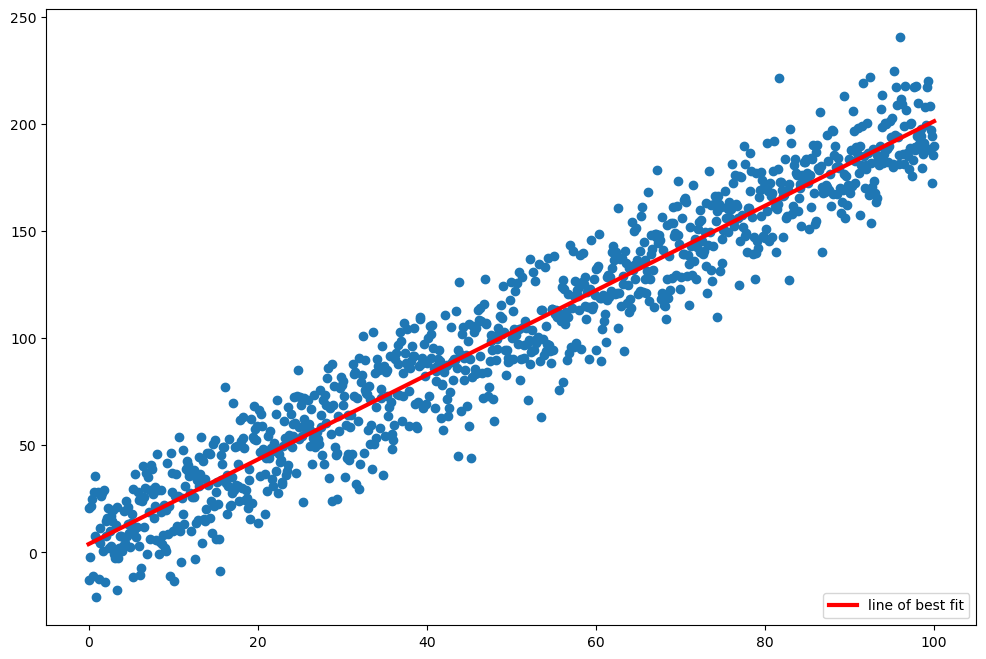

In [4]:
# visualize the solution
plt.scatter(xs, ys)
plt.plot(xs, bs[0] * xs + bs[1], color='red', lw=3, label='line of best fit')
plt.legend(loc='lower right');

The parameters we've obtained can be used for *inference*; that is, to make predictions using data that didn't appear in our initial dataset.

**Example, continued:** Suppose I would like to estimate $y$ given $x=32.745$. There is no point in the dataset with $x$-coordinate $32.745$, but I can use the parameters of the line I've fit to estimate a suitable $y$-coordinate: 

In [5]:
y_pred = bs[0] * 32.745 + bs[1]

print(y_pred)

68.50510524503233


## Higher Dimensions

One of the reasons linear algebra is so powerful is that it generalizes to higher dimensions easily. Consider now an $n\times p$ system of linear equations 

$$
    \begin{align*}
        y_1 &= m_1x_{11} + m_2x_{12} + \cdots + m_px_{1p} + b \\
        y_2 &= m_1 x_{21} + m_2x_{22} + \cdots + m_px_{2p} + b \\
        \vdots &  \\
        y_n &= m_1x_{n1} + m_2x_{n2} + \cdots + m_nx_{np} + b
    \end{align*}
$$

such as might result from modeling something that depends on multiple factors. For example, $y_i$ could represent the closing price of a share of a company's stock on day $i$, while $x_{i1}, \dots, x_{ip}$ could represent various data believed to impact the company's share price, such as the price the previous day, analyst sentiment, earnings data, and so on. This converts to a matrix equation $\mathbf{y} = X\mathbf{b}$ as before:

$$
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_n
    \end{bmatrix} = 
    \begin{bmatrix}
        x_{11} & x_{12} & \cdots & x_{1p} & 1 \\
        x_{21} & x_{22} & \cdots & x_{2p} & 1 \\
        \vdots & \vdots \\
        x_{n1} & x_{n2} & \cdots & x_{np} & 1 
    \end{bmatrix}\cdot
    \begin{bmatrix}
        m_1 \\
        m_2 \\
        \vdots \\
        m_p \\
        b
    \end{bmatrix}.
$$

As before, a best solution can be found via the normal equation $\mathbf{b} = (X^TX)^{-1}X^T\mathbf{y}$, provided that $X$ is nonsingular.  

```{admonition} On the Invertibility of $X$
:class: important

Note that it can be much more challenging to assess the invertibility of $X$ when the dimension of the problem is higher than 2. In fact,  it is worse than that: if $X$ is 'close' to singular, the solution becomes unstable: a small change in the inputs can produce a dramatically different output; see below for more detail on this.
```

## A Real-World Example

The [Student Performance Dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) is a dataset designed to examine the factors influencing academic student performance. The data is downloadable at the link or in this book's GitHub repository. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Predictor variables:

- **Hours Studied:** The total number of hours spent studying by each student.
- **Previous Scores:** The scores obtained by students in previous tests.
- **Extracurricular Activities:** Whether the student participates in extracurricular activities (Yes or No).
- **Sleep Hours:** The average number of hours of sleep the student had per day.
- **Sample Question Papers Practiced:** The number of sample question papers the student practiced.

Target Variable:

- **Performance Index:** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


In [6]:
df = pd.read_csv('./datasets/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


The target variable `Performance Index` will need to be separated from the dataset (this is our $\mathbf{y}$). Also, notice that the variable `Extracurricular Activities` is Boolean (True/False), but is recorded in the data as Yes/No, which Python will treat as strings, so we will need to encode it properly:

In [7]:
df = pd.get_dummies(df)
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,False,True
1,4,82,4,2,65.0,True,False
2,8,51,7,2,45.0,False,True
3,5,52,5,2,36.0,False,True
4,7,75,8,5,66.0,True,False


Notice that using `pd.get_dummies` produced two new columns: `Extracurricular_Activities_No` and `Extracurricular_Activities_Yes` that are perfectly correlated. In the interest of keeping the columns of our matrix linearly independent, we will drop one of these columns. Finally, we need to add a column of 1's corresponding to the intercept term in our linear model: 

In [8]:
y = df['Performance Index'].values  # separate the target variable from the input data 
df['Intercept'] = np.ones(shape=(10000,))  # add the intercept column of 1's 
df = df.drop(['Extracurricular Activities_No', 'Performance Index'], axis=1)  # drop the target and the redundant Extracurricular columns

Finally, we will convert the dataframe to a NumPy array:

In [9]:
X = df.values.astype(np.float64)
X

array([[ 7., 99.,  9.,  1.,  1.,  1.],
       [ 4., 82.,  4.,  2.,  0.,  1.],
       [ 8., 51.,  7.,  2.,  1.,  1.],
       ...,
       [ 6., 83.,  8.,  5.,  1.,  1.],
       [ 9., 97.,  7.,  0.,  1.,  1.],
       [ 7., 74.,  8.,  1.,  0.,  1.]])

In [10]:
y

array([91., 65., 45., ..., 74., 95., 64.])

We are now ready to fit the model:

In [11]:
bs = np.linalg.inv(X.T @ X) @ X.T @ y

In [12]:
print(bs)

[  2.85298205   1.01843419   0.48055975   0.19380214   0.61289758
 -34.07558809]


The last value in that list is the intercept term. The others are the slopes associated with the corresponding input features.

## Measuring Error

The solution to the normal equation is a set of coefficients for a linear model, and if input the original inputs (the $x$'s), we get the model's predictions for the $y$'s, which we typically denote $\mathbf{\hat{y}}$:

$$
    \mathbf{\hat{y}} = X^Tb.
$$

One way to measure the quality of the model is to calculate the *mean squared error*: the mean of the squared difference between the actual $y$-values and the predicted $y$-values.

```{admonition} Definition: Mean Squared Error
Given ground truth data $y_1, \dots, y_n$ and estimated values or predictions $\hat{y}_1,\dots, \hat{y}_n$, the *mean squared error* is defined as follows:

$$
    MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2.
$$
```

Notice that the definition of mean squared error can be expressed in terms of the norm of the *error* vector $\mathbf{e} = \mathbf{y} - \mathbf{\hat{y}}$:

```{admonition} Definition: Root Mean Squared Error as Norm
Given a vector containing ground-truth data $\mathbf{y}$ and a vector of estimated values or predictions $\mathbf{\hat{y}}$, the *mean squared error* is the normalized squared norm of the vector $\mathbf{y} - \mathbf{\hat{y}}$:

$$
    MSE = \frac{1}{n}||\mathbf{y} - \mathbf{\hat{y}}||^2 = \frac{1}{n}(\mathbf{y} - \mathbf{\hat{y}})^T(\mathbf{y} - \mathbf{\hat{y}}) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2.
$$
```

Here is the MSE for the model we have just fit:

In [13]:
mse = np.linalg.norm((y-(X @ bs)))**2 * (1/len(y))
print(mse)

4.151350633946038


Suppose we had asked a different question: assuming a linear model, determine the parameters $m_1, m_2, \dots, m_p, b$ that minimize the mean squared error. It is possible to show using calculus that the solution produced via the normal equation is the unique solution that minimizes mean squared error.

## Getting Around the Calculation of $(A^TA)^{-1}$

Apparently crucial to OLS is the calculation of $(A^TA)^{-1}$, despite the fact that it was indicated earlier that we would try to avoid the calculation of inverse matrices whenever possible. In fact, it is particularly important to do so here, because if there is any 'instability' in $A$, it propogates in $A^TA$. There is a construct called the *condition number* of a matrix that gives a bound on how inaccurate the solution $\mathbf{x}$ to $A\mathbf{x}=\mathbf{b}$ will be assuming approximation in $\mathbf{b}$, and this translates directly to matrix inversion, which amounts to solving $n$ linear systems $A\mathbf{x} = \mathbf{e}_i$, $1\leq i\leq n$ simultaneously (subtle detail: the condition number is purely a property of the matrix, it does not depend on $\mathbf{b}$ in any way).

While we don't yet have the background yet to go into detail on how condition number are calculated, it is worth pointing out that if the condition number of $A$ is $\kappa(A)$, the condition number of $A^TA$ is $\kappa(A)^2$, making it especially important to avoid the calculation of $(A^TA)^{-1}$ whenever we can.  

To do this, we need to develop another matrix factorization: $A=QR$. In this factorization, $Q$ has the property that $Q^T=Q^{-1}$, so $Q^TQ=I$, and $R$ is upper triangular. If we had such a factorization for $X$ in OLS, then

$$
    \begin{align*}
        \mathbf{y} &= X\mathbf{b} \\
        X^T\mathbf{y} &= X^TX\mathbf{b} \\
        (QR)^T\mathbf{y} &= (QR)^T(QR)\mathbf{b} \\
        (R^TQ^T)\mathbf{y} &= (R^TQ^T)(QR)\mathbf{b} \\
        R^TQ^T\mathbf{y} &= R^T(Q^TQ)R\mathbf{b} \\
        R^TQ^T\mathbf{y} &= R^TIR\mathbf{b} \\
        Q^T\mathbf{y} &= R\mathbf{b},
    \end{align*}
$$

where in the last step $R^T$ has been cancelled from both sides of the equation. $R$ is upper triangular, so we can calculate $Q^T\mathbf{y}$ on the left and then back-substitute to solve for $\mathbf{b}$ on the right without any matrix inversion calculations required at all.

Of course, that all depends on (a) the existence of a factorization $A=QR$ where $Q$ has the property that $Q^TQ=I$, and (b) our ability to compute this factorization efficiently. Both will be the subject of the next section.